# Prompting notebook

A collection of small exercises to get you started with Jupyter notebooks and language models 🐍

## Installing packages

In [76]:
!pip install transformers
!pip install torch
!pip install accelerate
!pip install pandas
!pip install pyarrow
!pip install scikit-learn

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 18.4 MB/s eta 0:00:00 0:00:01
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 19.8 MB/s eta 0:00:00a 0:00:01
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


## Importing packages

In [87]:
from transformers import AutoTokenizer
import transformers 
import torch
from sklearn.metrics import accuracy_score
import pandas as pd

## Loading the model

https://huggingface.co/google/flan-t5-base

context 
size
data
objective

In [ ]:

model = "google/flan-t5-base"

tokenizer = AutoTokenizer.from_pretrained(model)
pipeline = transformers.pipeline(
    "text2text-generation",
    model=model,
    torch_dtype=torch.float16,
)

In [94]:
pipeline("What is the capital of Denmark?")

[{'generated_text': 'st helsingborg'}]

Early approaches for language generation: 

Shannon (1948)

p(next word | previous words) = p(w_i | w_<i)

In [95]:
pipeline("The capital of Denmark is ")

[{'generated_text': 'Copenhagen'}]

In [96]:
pipeline("")

/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/transformers/generation/utils.py:1258: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


[{'generated_text': 'Copenhagen'}]

In [126]:
def chatbot(sentence: str):

    input = f"### Human: {sentence} ### Assistant: "

    result = pipeline(input)

    return input + result[0]['generated_text']

In [127]:
chatbot("What is the capital of Denmark?")

/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/transformers/generation/utils.py:1258: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


'### Human: What is the capital of Denmark? ### Assistant: Copenhagen'

In [128]:
chatbot("What is the meaning of life?")

'### Human: What is the meaning of life? ### Assistant: Life'

https://huggingface.co/docs/transformers/main_classes/text_generation

In [129]:
def custom_chatbot(sentence: str):

    input = f"### Human: {sentence} ### Assistant: "

    result = pipeline(input,
                    temperature = 1,
                    repetition_penalty=1,
                    max_new_tokens=20,
                    min_new_tokens=0,)

    return input + result[0]['generated_text']

In [ ]:
chatbot("What is the meaning of life?")

'### Human: What is the meaning of life? ### Assistant: Life'

## Using language models to solve problems

![image (3).png](<attachment:image (3).png>)
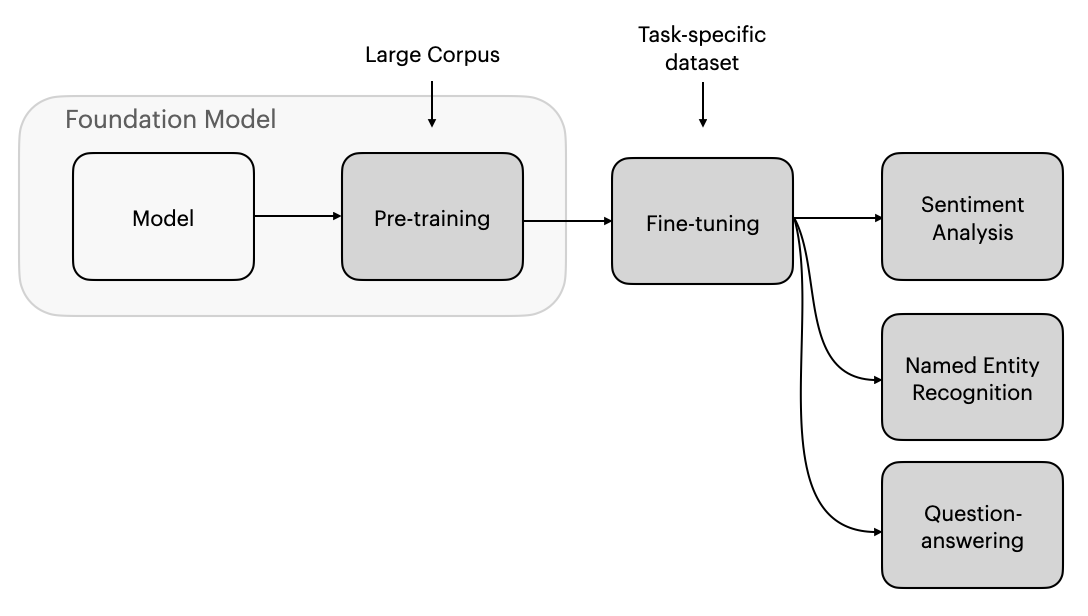

https://huggingface.co/datasets/stanfordnlp/sst2

In [48]:
df = pd.read_parquet("hf://datasets/stanfordnlp/sst2/data/validation-00000-of-00001.parquet")
df

,idx,sentence,label
0,0,it 's a charming and often affecting journey .,1
1,1,unflinchingly bleak and desperate,0
2,2,allows us to hope that nolan is poised to emba...,1
3,3,"the acting , costumes , music , cinematography...",1
4,4,"it 's slow -- very , very slow .",0
...,...,...,...
867,867,has all the depth of a wading pool .,0
868,868,a movie with a real anarchic flair .,1
869,869,a subject like this should inspire reaction in...,0
870,870,... is an arthritic attempt at directing by ca...,0


In [49]:
df.sentence[0]

"it 's a charming and often affecting journey . "

In [135]:
def sentiment_classifier(sentence: str):

    input = f"Is the following sentence positive or negative? {sentence}? Answer using 0 for negative and 1 for positive: "

    result = pipeline(input)

    return int(result[0]['generated_text'])

In [133]:
sentiment_classifier(df.sentence[0])

1

In [136]:
labels = [sentiment_classifier(sentence) for sentence in df.sentence[:10]]

/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/transformers/generation/utils.py:1258: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [137]:
labels

[1, 0, 1, 1, 0, 1, 0, 0, 1, 0]

### Evaluating the model

Accuracy quantifies how often the predictions are correct. It is the ratio of the number of correct predictions to the total number of predictions.

In [138]:
accuracy_score(df.label[:10], labels)


1.0

In [139]:
labels = [sentiment_classifier(sentence) for sentence in df.sentence]

/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/transformers/generation/utils.py:1258: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [140]:
accuracy_score(df.label, labels)

0.9243119266055045

In [141]:
df[df.label != labels]

,idx,sentence,label
20,20,pumpkin takes an admirable look at the hypocri...,0
62,62,the primitive force of this film seems to bubb...,1
78,78,"there is nothing outstanding about this film ,...",1
92,92,"you wo n't like roger , but you will quickly r...",0
93,93,if steven soderbergh 's ` solaris ' is a failu...,1
...,...,...,...
827,827,"the movie , directed by mick jackson , leaves ...",0
832,832,manages to show life in all of its banality wh...,0
846,846,"an absurdist comedy about alienation , separat...",0
847,847,"... mafia , rap stars and hood rats butt their...",1


In [148]:
df[df.label != labels]["sentence"][20]

'pumpkin takes an admirable look at the hypocrisy of political correctness , but it does so with such an uneven tone that you never know when humor ends and tragedy begins . '

## Takeaways